## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline

In [9]:
df = pd.read_csv('data/human_body_temperature.csv')

In [10]:
df.head(2)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0


### 1.  Is the distribution of body temperatures normal? 

We'll go ahead and plot the histogram of the temperatures and check if it looks normal. To confirm, we'll also plot the q-q plot and check how normal it is.

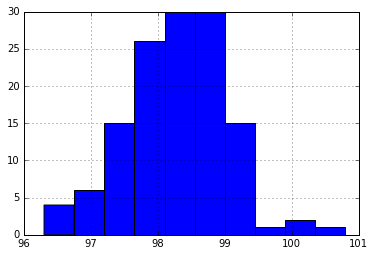

In [19]:
df['temperature'].hist()

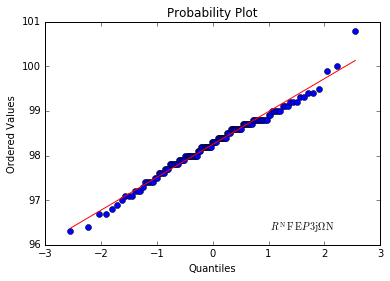

In [16]:
import scipy.stats as stats
import pylab 

stats.probplot(df['temperature'], dist="norm", plot=pylab)
pylab.show()

From the histogram, we can see that the distribution looks normal but it is skewed to the right. Also, there seems to be another small peak at around x=100 which isn't characteristic of a normal distribution (there might be two modes?). Also, the q-q plot seems to waver towards the ends suggesting that it isn't a perfect normal distribution.

### 2.  Is the true population mean really 98.6 degrees F?

Let's first check out the number of observations and the sample mean. Then, using a t-test or a z-test, we can calculate the confidence interval.


In [133]:
num_obs=len(df['temperature'])
sample_mean=df['temperature'].mean()
sample_sd=df['temperature'].std()
print "Number of observations :", num_obs
print "Sample mean : ", sample_mean
print "Sample standard deviation : ", sample_sd

Number of observations : 130
Sample mean :  98.2492307692
Sample standard deviation :  0.733183158039


Let's first formulate the null hypothesis $H_0$ and the alternate hypotheses $H_A$.

$H_0$ : Body Temperature is $98.6 ^{\circ} F$

$H_A$ : Body Temperature is not $98.6 ^{\circ} F$

In [87]:
from statsmodels.stats.weightstats import ztest
print ztest(df.temperature,value=98.6)
print stats.ttest_1samp(df.temperature,98.6)

(-5.4548232923645195, 4.9021570141012155e-08)
Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


Both the pvalues are less very small, indicating that we can reject the null hypothesis. This means that the average temperature is not 98.6. 

### 3.  At what temperature should we consider someone's temperature to be "abnormal"?

We calculate a confidence interval on the true population average temperature. If someone's temperature is out of this interval, we could say that the temprerature is abnormal.

In [122]:
sigma_e = sample_sd/np.sqrt(num_obs)
margin = 1.96*sigma_e #95% confidence
confidence_interval = [sample_mean-margin,sample_mean+margin]
confidence_interval


[98.123194112228518, 98.375267426233037]

In [125]:
print stats.norm.interval(.95,loc=sample_mean,scale=sample_sd/np.sqrt(num_obs))
print len(df[(df.temperature < 98.131) | (df.temperature > 98.375)])
print num_obs

(98.123196428181657, 98.375265110279898)
115
130


_Problem : We observe that 115 out of a otal 130 are out of this range. _

So, we can say that, if someone's temperature is above 98.3752 or below 98.1231, then their temperature is considered abnormal.



In [130]:
# sigma_e = sample_sd/np.sqrt(num_obs)
# margin = 1.96*sigma_e #99% confidence
# confidence_interval = [sample_mean-margin,sample_mean+margin]
# confidence_interval

In [131]:
# print stats.norm.interval(.99,loc=sample_mean,scale=sample_sd/np.sqrt(num_obs))
# print len(df[(df.temperature < 98.08) | (df.temperature > 98.41)])
# print num_obs

### 4. Is there a significant difference between males and females in normal temperature?

We have two different samples and we do not know the population standard deviation. Hence, a two sample t-test seems to be the right test to use. The test measures whether the average (expected) value differs significantly across samples.

In [143]:
f_temp = np.array(df.temperature[df.gender=='F'])
m_temp = np.array(df.temperature[df.gender=='M'])

print(len(m_temp))
print(len(f_temp))

65
65


In [144]:
stats.ttest_ind(f_temp,m_temp)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

We see that the pvalue is 0.023 which is quite small. Hence, we reject the hypothesis that the average values are equal among the two samples. 

*Significance* : This means that the there is a significant difference between males and females in normal temperature.